## Random Forests & Decision Tree - Customer Classification

The main objective of this project is to access if the product (bank term deposit) would be taken by the customer or not. The data provided is related to direct marketing campaigns (phone calls) of a banking institution.

#### 1: Exploratory Data Analysis 

In [1]:
##Import neccesary packages required for exploratory data analysis & visualisation
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing statistical packages
from scipy import stats
from scipy.stats import zscore
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Loading the dataset to python environment
bankdata=pd.read_csv("bank-full.csv")

#Only when we understand the nature of data, we would be able to assess how each column contributes to the marketing campaign.
The below are the customer information provided by the marketing team - pivoted by customer's background information along with campaign information

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student', technician', unemployed', un
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school', illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', .., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=D0 then y='no'). Yet, the duration is
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
#Viewing sample data random 5 rows to understand the data. 
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


It could be seen that few columns are mentioned as 'unknown'. These values also needs to be treated in addition to NULL values.

In [5]:
# 5 Point Summary of Numerical attributes.This gives statistical information of numerical values in the dataset like mean, count, median (50%), std deviation etc.
bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#Checking the shape of dataset. This gives number of columns & rows available in the dataset
bankdata.shape

(45211, 17)

In [7]:
#Checking for null values in the dataset using lambda function
bankdata.apply(lambda x : sum(x.isnull()))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
#Checking for unique values available @ each column. This would give a fair idea on the categorical variables - are they binary/multiple values are available etc.  
bankdata.apply(lambda x : len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [9]:
#Checking for Nulls & data type of each column
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Eventhough there are no null values in the dataset, we could find that many columns have values labeled as 'unknown'. 

Also, we could see that most of the string columns are tagged as 'object' that refers to a generic datatype. We can either change the datatype to string/char or label these columns with keywords like the one mentioned below. We are leaving job alone as generic datatype since this column will be transformed to dummies in the later part

In [10]:
replace_struct={"marital": {"single":0 ,"married":1,"divorced":2},
"contact": {"unknown":0,"telephone":1,"cellular":2},
"poutcome":{"other":-1,"unknown":0,"success":1,"failure":2},
"month": {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
"default":{"yes":1, "no":0},
"loan":{"yes":1, "no":0},
"housing":{"yes":1, "no":0},
"Target": {"no":0,"yes":1},
"education":{"primary":1,"secondary":2,"tertiary":3,"unknown":0}
}

bankdata=bankdata.replace(replace_struct)
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  Target     45211 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 5.9+ MB


In [11]:
#Checking the dataset sample data to see how data looks after the categorical columns are replaced with keywords
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,technician,0,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,entrepreneur,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,blue-collar,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,unknown,0,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [12]:
bankdata.corr()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,0.403240,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.011541,0.025155
marital,0.403240,1.000000,-0.095415,0.007023,-0.002122,0.016096,0.046893,-0.039201,0.005261,0.050938,-0.011852,0.008994,-0.019172,-0.014973,-0.006148,-0.045588
education,-0.173615,-0.095415,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.151481,0.021661,0.067935,0.002554,0.000194,0.007092,0.025295,0.023929,0.051341
default,-0.017879,0.007023,-0.009035,1.000000,-0.066745,-0.006025,0.077234,-0.015404,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.026062,-0.022419
balance,0.097783,-0.002122,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.017669,0.052838
housing,-0.185513,0.016096,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.188123,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,0.061869,-0.139173
loan,-0.015655,0.046893,0.004307,0.077234,-0.084350,0.041323,1.000000,0.010873,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.013531,-0.068185
contact,-0.026221,-0.039201,0.151481,-0.015404,0.027273,-0.188123,0.010873,1.000000,0.027936,0.173779,0.020839,-0.019614,0.244816,0.147811,0.193538,0.148395
day,-0.009120,0.005261,0.021661,0.009424,0.004503,-0.027982,0.011370,0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.061163,-0.028348
month,0.092903,0.050938,0.067935,0.014989,0.094605,-0.173887,0.021638,0.173779,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600,-0.024025,0.018717


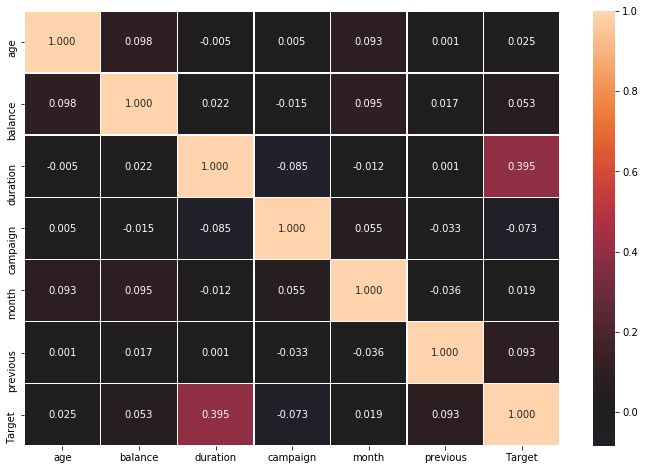

In [13]:
#Visualising the correlation between various columns in the dataset
#The columns that have negative correlation to Target has been removed for this plot alone
corr_data= bankdata[['age','balance','duration','campaign','month', 'previous','Target']]
corr_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_data.corr(), annot=True, fmt='0.3f', center=0,linewidths=.5)

#### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D1AF6A1C8>,
      dtype=object)

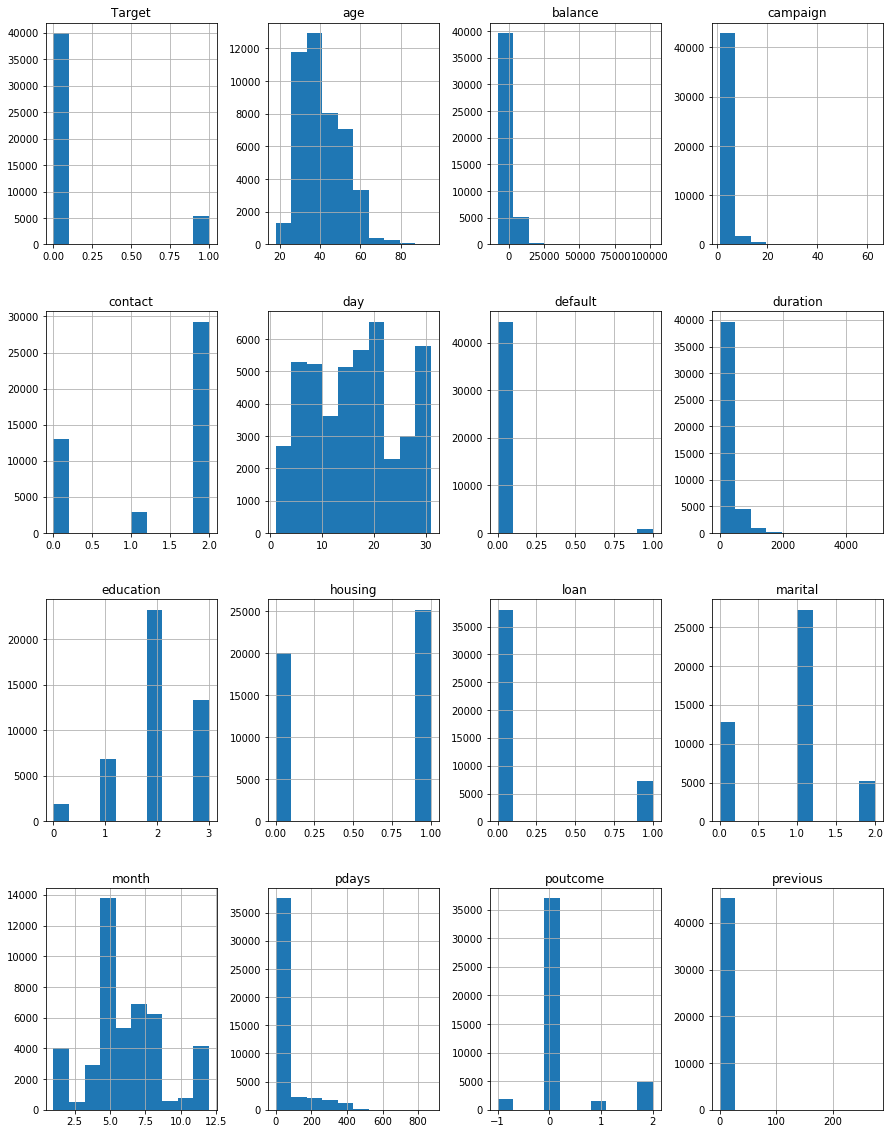

In [14]:
bankdata.hist(figsize=(15,20))

It could be seen that most of the data items are categorical by nature. Age is normally distributed & slightly left skewed.
Columns like pdays, balance, campaign, duration etc are heavily left skewed
Other columns like days, months doesn't follow any normal distribution pattern

#### Visual Representation

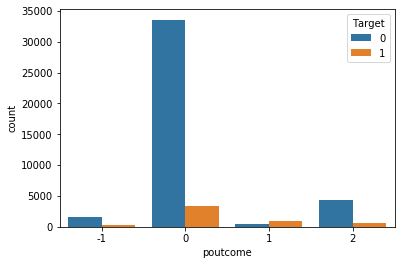

In [15]:
sns.countplot(x="poutcome", hue="Target", data=bankdata)

poutcome value of 1 shows higher Target=1 count in comparison to other customer buckets

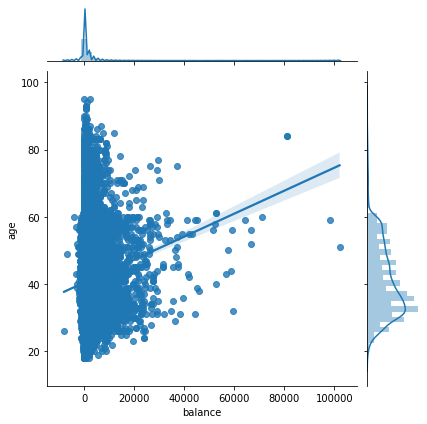

In [16]:
sns.jointplot(data=bankdata,x="balance", y="age", kind="reg")

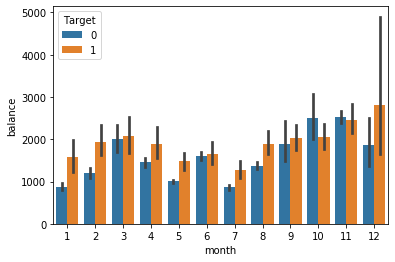

In [17]:
sns.barplot(x='month',y='balance' , hue="Target",data=bankdata)

Considering the trend of 3 continuous months, it could be seen that months between 5,6,7 have lesser balance overall, but Target is more achieved in months 12,1,2 (assuming the data runs across years: Dec (Prev Year), Jan (Current Year) & Feb (Current Year) are considered as 3 consecutive months)

##### Handling Outliers

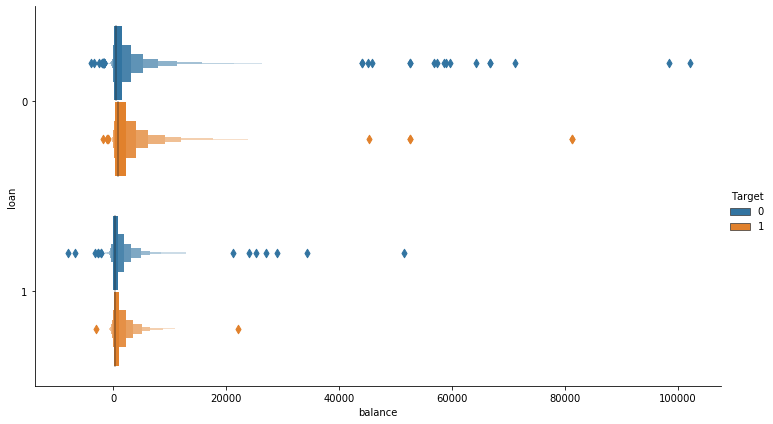

In [18]:
g = sns.catplot(x='balance', y='loan', data=bankdata, hue='Target',orient="h", kind="boxen", height=6, aspect=1.7)

In [19]:
#Adding an additional column for z-score balance to identify the outliers in the column. 
#After applying z-score,any value that appears outside -3 to +3 can be treated as outliers 
bankdata['balance_zscore']=bankdata['balance']
bankdata['balance_zscore']=zscore(bankdata['balance_zscore'])
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,balance_zscore
0,58,management,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0,0.256419
1,44,technician,0,2,0,29,1,0,0,5,5,151,1,-1,0,0,0,-0.437895
2,33,entrepreneur,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0,-0.446762
3,47,blue-collar,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0,0.047205
4,33,unknown,0,0,0,1,0,0,0,5,5,198,1,-1,0,0,0,-0.447091


In [20]:
#Removing outliers
bankdata=bankdata.drop(bankdata[(bankdata['balance_zscore']>3)|(bankdata['balance_zscore']<-3)].index, axis=0, inplace=False)
bankdata.shape

(44466, 18)

In [21]:
#Removing unwanted columns
bankdata=bankdata.drop(['pdays', 'poutcome'],axis=1)
bankdata.shape

(44466, 16)

In [22]:
#Removing the rows from dataset where education column is set as '0'
bankdata=bankdata.drop(bankdata[bankdata['education']==0].index, axis=0,inplace=False)
bankdata.shape

(42644, 16)

In [23]:
#Objective of creating dummy variables is to convert categorical data to binary format since some scikit packages doesn't accept Non-Numerical data. 
#Each values in the job / education category will be split into individual columns & each of the column will hold binary data
oneHotcode =['job','education']
bankdata=pd.get_dummies(bankdata,columns=oneHotcode)
bankdata.shape
bankdata.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_1,education_2,education_3
0,58,1,0,2143,1,0,0,5,5,261,...,0,0,0,0,0,0,0,0,0,1
1,44,0,0,29,1,0,0,5,5,151,...,0,0,0,0,1,0,0,0,1,0
2,33,1,0,2,1,1,0,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,1,0,231,1,0,0,5,5,139,...,0,0,0,0,0,0,0,0,0,1
6,28,0,0,447,1,1,0,5,5,217,...,0,0,0,0,0,0,0,0,0,1


In [24]:
bankdata=bankdata.drop(['job_unknown'],axis=1)
bankdata.shape

(42644, 28)

#### Modelling: Trying classification algorithms & evaluating their performances

In [25]:
# Splitting the Data into test & train. x represents feature columns & Y represents target column. 
# The dataset is prepared in such a way that only features data is available in x & only Target is available in Y  
# The x, Y, test & train data created here will be used for further modelling purposes
x=bankdata.drop(['Target'], axis=1)
Y=bankdata['Target']
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, train_size = 0.7, test_size = 0.3, random_state = 1)

Various classification models are computed & their performance is assessed through accuracy score in training dataset, test dataset & confusion matrix in the same order for all modeling techniques

In [26]:
#Logistic Regression modelling
model = LogisticRegression(solver='sag',max_iter=10000)
model.fit(x_train, Y_train)                 
model_score = model.score(x_test, Y_test)
lr_predict = model.predict(x_test)
lr_score_trn=model.score(x_train, Y_train)
lr_score_tst=model.score(x_test, Y_test)
print(lr_score_trn)
print(lr_score_tst)
print(metrics.confusion_matrix(Y_test, lr_predict))

0.8912227805695142
0.8857276848522745
[[11081   176]
 [ 1286   251]]


In [27]:
KNNModel = KNeighborsClassifier(n_neighbors =95)
# fitting the model
KNNModel.fit(x_train,Y_train)
# predict the response
knn_pred = KNNModel.predict(x_test)
# evaluate accuracy
print(KNNModel.score(x_test, Y_test))
knn_score_trn=KNNModel.score(x_train, Y_train)
knn_score_tst=KNNModel.score(x_test, Y_test)
print(metrics.confusion_matrix(Y_test, knn_pred))

0.8846334219165234
[[11078   179]
 [ 1297   240]]


In [28]:
#Naive Bayes classification algorithm
NBModel = GaussianNB()
NBModel.fit(x_train, Y_train)
nb_pred= NBModel.predict(x_test)
print(NBModel.score(x_train, Y_train))
print(NBModel.score(x_test, Y_test))
ConfMat=metrics.confusion_matrix(Y_test, nb_pred, labels=[1, 0])
print (ConfMat)
nb_score_trn=NBModel.score(x_train, Y_train)
nb_score_tst=NBModel.score(x_test, Y_test)

0.8338023450586265
0.834688135063311
[[ 695  842]
 [1273 9984]]


In [29]:
# Building a Support Vector Machine
SVCModel = SVC(C= .1, kernel='rbf', gamma= 'auto')
SVCModel.fit(x_train, Y_train)
svc_pred= SVCModel.predict(x_test)
print(SVCModel.score(x_train, Y_train))
print(SVCModel.score(x_test, Y_test))
svc_score_trn=SVCModel.score(x_train, Y_train)
svc_score_tst=SVCModel.score(x_test, Y_test)
print(metrics.confusion_matrix(Y_test, svc_pred))

0.8865326633165829
0.8798655619821791
[[11257     0]
 [ 1537     0]]


#### Building a Decision Tree

In [30]:
# Building a standard decision tree. This works well for train data, but performance decreases in test data. 
# This implies when the max depth is not set, the classification does a overfitting. 
# In real-time this kind of modeling tend to fail in production but works well with training data
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, Y_train)
print(dTree.score(x_train, Y_train))  

1.0


In [31]:
# In order to overcome the overfitting issue, we have added max_depth. 
# Lesser value for max depth would lead to underfitting & more  value would lead to overfitting.
# The max depth value is set in such a way that a balance is maintained between overfitting & underfitting
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=5,random_state=1)
dTree.fit(x_train, Y_train)
dtree_pred=dTree.score(x_test, Y_test)
print(dTree.score(x_train, Y_train))
print(dTree.score(x_test, Y_test))
dtree_score_trn=dTree.score(x_train, Y_train)
dtree_score_tst=dTree.score(x_test, Y_test)
# Based on the importance features, we can consider the columns that are of higher values alone into consideration 
# Low / zero values doesn't contribute much to the decision tree modeling 
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns))

0.8993969849246232
0.88893231202126
                        Imp
age                0.045375
marital            0.004013
default            0.000000
balance            0.000000
housing            0.100434
loan               0.000000
contact            0.022978
day                0.001884
month              0.071130
duration           0.660326
campaign           0.000000
previous           0.090527
balance_zscore     0.002385
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000947
education_1        0.000000
education_2        0.000000
education_3        0.000000


#### Ensemble Techniques: Bagging & Boosting Classifiers

In [32]:
#Bagging Classifier algorithm is used here & base estimator is selected as Decision tree (max_depth specified) that we modeled few steps before.
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, Y_train)
bgcl_pred = bgcl.predict(x_test)
print(bgcl.score(x_test, Y_test))
ConfMat=metrics.confusion_matrix(Y_test, bgcl_pred, labels=[1, 0])
print (ConfMat)
bgcl_score_trn=bgcl.score(x_train, Y_train)
bgcl_score_tst=bgcl.score(x_test, Y_test)

0.8919024542754416
[[  474  1063]
 [  320 10937]]


In [33]:
#Trying Adaboost Classifier algorithm modeling similar to bagging classifier 
abcl = AdaBoostClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, Y_train)
abcl_pred = abcl.predict(x_test)
print(abcl.score(x_test, Y_test))
ConfMat=metrics.confusion_matrix(Y_test, abcl_pred, labels=[1, 0])
print (ConfMat)
abcl_score_trn=abcl.score(x_train, Y_train)
abcl_score_tst=abcl.score(x_test, Y_test)

0.8923714241050492
[[  696   841]
 [  536 10721]]


#### Model Performance Comparison

In [34]:
d = {'Model': ['LR','KNN','NB','SVC', 'DTree', 'Bagging','AdaBoost'],
     'Training val':[lr_score_trn,knn_score_trn,nb_score_trn,svc_score_trn,dtree_score_trn, bgcl_score_trn, abcl_score_trn], 
     'Test Val': [lr_score_tst,knn_score_tst,nb_score_tst,svc_score_tst,dtree_score_tst, bgcl_score_tst, abcl_score_tst],}
print (d)

{'Model': ['LR', 'KNN', 'NB', 'SVC', 'DTree', 'Bagging', 'AdaBoost'], 'Training val': [0.8912227805695142, 0.8922948073701843, 0.8338023450586265, 0.8865326633165829, 0.8993969849246232, 0.9032160804020101, 0.9515242881072027], 'Test Val': [0.8857276848522745, 0.8846334219165234, 0.834688135063311, 0.8798655619821791, 0.88893231202126, 0.8919024542754416, 0.8923714241050492]}


In [35]:
eval=pd.DataFrame(d)
print(eval)

      Model  Training val  Test Val
0        LR      0.891223  0.885728
1       KNN      0.892295  0.884633
2        NB      0.833802  0.834688
3       SVC      0.886533  0.879866
4     DTree      0.899397  0.888932
5   Bagging      0.903216  0.891902
6  AdaBoost      0.951524  0.892371


#### Conclusion

By applying logistic regression, classification and estimation model were built with 88.57% score. Other models such as NB, KNN, SVC didn't yield this much score eventhough KNN was bit closer to LR.

When Decision Tree algorithms & ensemble techniques were applied, the score improved to 88.89% (DTree) upto 89.23% (Boosting)

With either of ensemble techniques, the bank will be able to predict better if the customer would subscribe to the product as a response to the Bank's telemarketing campaign.